In [386]:
#First we will import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from datetime import datetime
from datetime import date
import calendar

# Reading the Data

In [387]:
#Loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Variable Identification
Now we will use Variable Identification to see the dimensions, columns, d_types, first few rows, predictal and traget variables from the dataset.

In [388]:
#Dimensions
train.shape,test.shape

((12980, 12), (4399, 11))

According to these Dimensions, there are 12 columns in the "train" dataset and 11 columns in "test" dataset, which depicts that the Target Variable may be missing from the "test" dataset.

In [389]:
#Cloumn Names
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [390]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

It turns out to be true that the Target Variable i.e. "count" is missing from the "test" datset.

In [391]:
#Data Types
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [392]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

According to these dtypes, only "datetime" columns is a 'object' Datatype and all others are either 'Integers' or 'Float'. So, we may need to extract features from the "datetime" column which we will do later in the Variable Tranformation Section.

In [393]:
#First Few Rows
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [394]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


Here we can see that there are 12 columns in the 'train' dataset, whereas in the 'test' dataset, there are only 11 columns.
It is pretty clear that the "count" variable is the Target or Dependent Variable.
Since, we have a Target Variable, this is a Supervised Learning Problem and the nature of the Target Variable is Continous, we will be using the Regrssion Method for creating a model.

# Univariate Analysis
Now that we have our Target Variable i.e. "count" and it is Countinous in nature, we will perform analysis using Graphical method in Univariate Analysis.


C:\Users\Hashm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

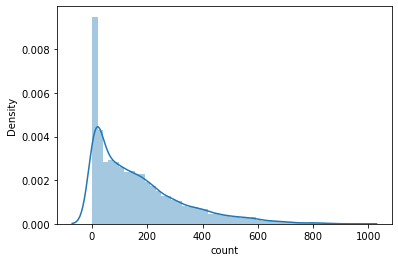

In [395]:
#Distribution of the Target Variable
sn.distplot(train["count"])

The Graphical Distribution of the Target Variables is Right Skewed, so we will take the log of the variable and see if the distribution becomes normal.

C:\Users\Hashm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

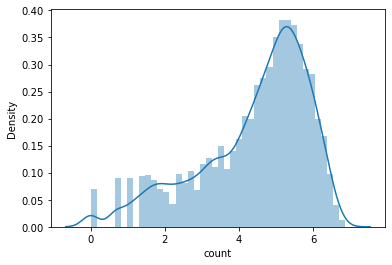

In [396]:
#Logged distribution of the Target Variable
sn.distplot(np.log(train["count"]))

Now the distribution is less skewed and we can consider it as a normally distributed graph of the target variable.

# Bivariate Analysis
We will analyse the realtion between the Independent and the Dependent Variables and see how Corelated they are with each other by using Bivariate Analysis and a HeatMap.

In [397]:
#Corelation of the varibales
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.010959,0.014343,-0.013005,0.394560,0.397765,0.181712,-0.135762,0.104657,0.085699,0.100687
holiday,-0.010959,1.000000,-0.248558,-0.018406,-0.025104,-0.032903,-0.029520,0.021646,0.029135,-0.046053,-0.029340
workingday,0.014343,-0.248558,1.000000,0.052788,0.060589,0.064840,0.028026,0.001986,-0.307930,0.131819,0.018842
weather,-0.013005,-0.018406,0.052788,1.000000,-0.093655,-0.094877,0.432497,0.011120,-0.161752,-0.139034,-0.161018
temp,0.394560,-0.025104,0.060589,-0.093655,1.000000,0.991839,-0.048478,-0.008669,0.459414,0.344451,0.415938
atemp,0.397765,-0.032903,0.064840,-0.094877,0.991839,1.000000,-0.031606,-0.049997,0.454015,0.342345,0.412644
humidity,0.181712,-0.029520,0.028026,0.432497,-0.048478,-0.031606,1.000000,-0.296975,-0.320253,-0.279501,-0.322269
windspeed,-0.135762,0.021646,0.001986,0.011120,-0.008669,-0.049997,-0.296975,1.000000,0.079524,0.100579,0.105607
casual,0.104657,0.029135,-0.307930,-0.161752,0.459414,0.454015,-0.320253,0.079524,1.000000,0.509175,0.707938
registered,0.085699,-0.046053,0.131819,-0.139034,0.344451,0.342345,-0.279501,0.100579,0.509175,1.000000,0.968329


In [398]:
#HeatMap of the correlation

<AxesSubplot:>

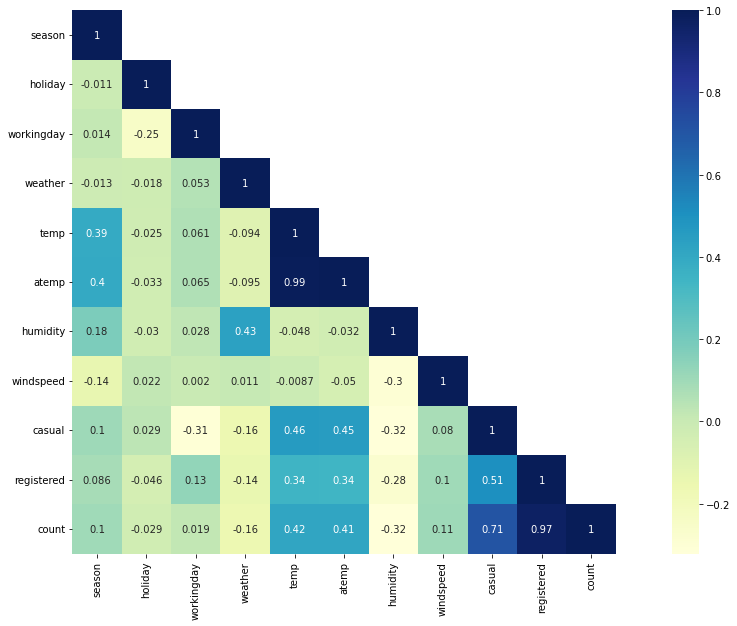

In [399]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] =False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(train.corr(),mask = mask,vmax= 1,square =True ,annot= True, cmap="YlGnBu")

Here we have the Corelation between all the variables in the data set with each other and it explains that:
1. All the all the variables have respective relation with the target variable except "datetime', since it is a "Object" data type, it can not have a corelation with the other "Integer" variable.
2. We can also see that the corelation of "temp" and "atemp" is very strong and it can create erorrs in predicting the data, so we will drop one them while creating the model.
3. "registered" and "casual" variables also have a positive strong corelation with the Target Variable, where as "holiday", "weather" and "humidity" have respective negetive corelation with the Target Variable.

# Missing Values
Befor buildding the model, lest check if there are any missing values in the dataset and if there are, we will treat them accordingly.

In [400]:
#Detecting Missing Values
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [401]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

Here we cam see that there are nethier Missing Values in our dataset nor any outliers.

# Variable Tranformation
Let's modify our data set to suit to the algorithm that we are applying i.e. Linear Regression which only excepts continous variables as its input.In this dataset, variable "datetime" is of "object" data type, which is not a continous variable. 

So, we are going to extract out the features from the "datetime" variable which will be of "Integer" or "Float" datatype.

We can extract date, hour and month from the "datetime" variable using Datetime Module.

In [402]:
#Extracting Date,Hour and Month From "datetime" : "train"
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").month)

Let's see how we have modified our dataset.

In [403]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,2011-01-01,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308,2012-06-29,20,6
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236,2012-06-29,21,6
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163,2012-06-29,22,6
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48,2012-06-29,23,6


Here you can see that we have extracted features such as "date","hour"and "month" from the "datetime" variable and stored them in different variables respectively.

Let's modify our "test" dataset too, in the same way we did it for the "train" data set.

In [404]:
#Extracting Date,Hour and Month From "datetime" : "test"
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").month)

Before droping the unnecessary variable, lets first divide the "train" dataset into two parts, i.e. "training" and "validation". Where, "training' data will be the one with which we will train our model and use the 'validation' part to check the score and prformance of our model.

In [405]:
training = train[train["datetime"]<="2012-03-31 23:59:59"]

In [406]:
training

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,2011-01-01,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10816,2012-03-31 19:00:00,2,0,0,1,17.22,21.210,71.0,30.0026,93,191,284,2012-03-31,19,3
10817,2012-03-31 20:00:00,2,0,0,2,16.40,20.455,71.0,22.0028,52,156,208,2012-03-31,20,3
10818,2012-03-31 21:00:00,2,0,0,2,16.40,20.455,71.0,22.0028,36,107,143,2012-03-31,21,3
10819,2012-03-31 22:00:00,2,0,0,2,15.58,19.695,71.0,16.9979,40,116,156,2012-03-31,22,3


In [407]:
validation = train[10821:]

In [408]:
validation

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
10821,2012-04-01 0:00:00,2,0,0,2,14.76,16.665,76.0,16.9979,8,59,67,2012-04-01,0,4
10822,2012-04-01 1:00:00,2,0,0,2,14.76,17.425,76.0,11.0014,13,49,62,2012-04-01,1,4
10823,2012-04-01 2:00:00,2,0,0,2,14.76,17.425,76.0,11.0014,20,61,81,2012-04-01,2,4
10824,2012-04-01 3:00:00,2,0,0,2,13.94,16.665,81.0,8.9981,4,21,25,2012-04-01,3,4
10825,2012-04-01 4:00:00,2,0,0,2,13.94,17.425,81.0,6.0032,3,9,12,2012-04-01,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308,2012-06-29,20,6
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236,2012-06-29,21,6
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163,2012-06-29,22,6
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48,2012-06-29,23,6


At last, we will drop the unnecessary vairable from the dataset so that it will not create hindrance and affect our data in any way.

So we drop the unnecessary variables like "datetime","date" and "atemp" from both the data set.

In [409]:
test = test.drop(["datetime", "atemp","date"],axis=1)
validation = validation.drop(["datetime","atemp","date"],axis=1)
training = training.drop(["datetime","atemp","date"],axis=1)

# Model Building

Now that we our data is modified and ready to use, lets create the model which will predict the target variable im the dataset.

First we have to import the module through which we are going to build our model.

In [410]:
#Importing Linear Regression
from sklearn.linear_model import LinearRegression

Now that we have imported the model, lest assign a name to it.

In [411]:
lreg = LinearRegression()

Before using the module, lets divide our training and validation dataset acoordingly.

The training dataset will be divided into two part, out of which, one will be "x_train" which will contain the Independent Variables, and second will be "y_train" which will contain only the Dependent Variable.

Similarly, we will apply the same concept on the validation dataset and divide them into "x_val" and "y_val" respectively.

In [412]:
#Dividing the training dataset
x_train = training.drop("count",axis=1)

In [413]:
y_train = training["count"]

In [414]:
x_val = validation.drop("count",axis=1)
y_val = validation["count"]

C:\Users\Hashm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

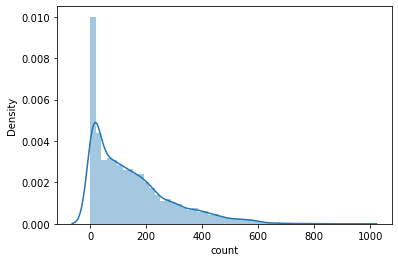

In [415]:
sn.distplot(y_train)

C:\Users\Hashm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

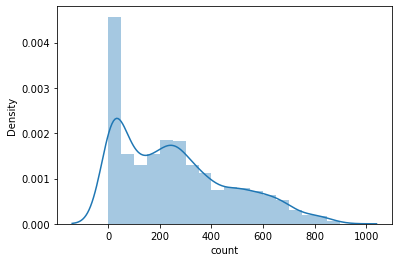

In [416]:
sn.distplot(y_val)

Since the distribution of the target variables in both training and validiation dataset seems to be Right Skewed, we will apply logarithm to both of the dataset and see if it turns out to be a normally distributed.

In [417]:
y_train = np.log(training["count"])
y_val = np.log(validation["count"])

Now lets see if the distribution turns out to be a normal distribution.

C:\Users\Hashm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

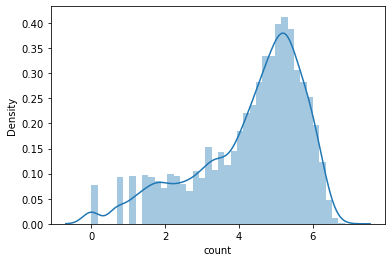

In [418]:
sn.distplot(y_train)

C:\Users\Hashm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

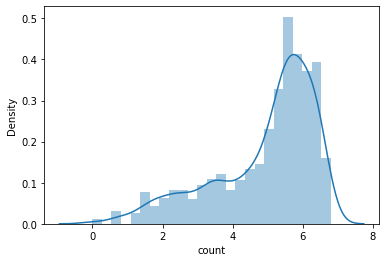

In [419]:
sn.distplot(y_val)

Now lets see what are the dimensions of the datasets which we have created.

In [420]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((10813, 11), (10813,), (2159, 11), (2159,))

Now we have to train our model using the training dataset.

To do that, we have to fit the training dataset into the model.

In [421]:
#Fitting training data to the Model
lreg.fit(x_train,y_train)

LinearRegression()

We have fitted the training data into the model which means our data is now trained and we can use this model to make predictios on the validation dataset.

So lets predict the target variable in the validation dataset.

In [422]:
#Predicting the validation dataset
pred=lreg.predict(x_val)

We have predicted the values of Target Variable for the validation dataset and stored it in another dataset named as "pred".

Since the evaluation metric in the problem statement is RMSLE score, we will find out the RMSLE score of the predicted values and the actual values.

RMSLE is Root Mean Squared Error, which defines how far the values lies from the actual values. So, we need the RMSLE score to be as close to 0 as possible.

In [423]:
from sklearn.metrics import mean_squared_error

In [424]:
rmse_val =mean_squared_error(y_val,pred,squared=False)

In [425]:
rmse_train = mean_squared_error(y_train,lreg.predict(x_train),squared =False)

In [426]:
rmse_val

0.9131101724224706

Since the RMSLE score turns out to be 0.91, we are now going to use Decision Tree which will further reduce the RMSLE score closer to 0.

In [427]:
#Importing Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [428]:
#Assigning Name to the DTR
dt_reg = DecisionTreeRegressor()

In [429]:
#Fitting training data
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [430]:
#Predicting the validation data
pred = dt_reg.predict(x_val)

In [431]:
#Finding RMSLE score of the validation data
dt_rmse_val=mean_squared_error(y_val,pred,squared=False)

In [432]:
#Finding RMSLE score of training data
dt_rmse_train = mean_squared_error(y_train,dt_reg.predict(x_train),squared= False)

Now that we have trained our model using the Decision Tree Regressor and the RMSLE score is good i.e. close to 0 , we can make prediction on the "test" dataset. 

In [434]:
#Using trained Model in the test dataset
test_pred = dt_reg.predict(test)

In [435]:
test_pred

array([4.06044301, 4.12713439, 3.13549422, ..., 4.49980967, 4.09434456,
       3.8918203 ])

These are the Logged Values, so we have to convert them into the orignal values.

In [436]:
#Converting Values to Orignal Scale
test_pred_final = np.exp(test_pred)

In [437]:
test_pred_final

array([58., 62., 23., ..., 90., 60., 49.])

We have successfully predicted the values of the target variable in the "test" dataset which we will save into a csv file "submission".

In [441]:
submission_ = pd.read_csv("submission.csv")

In [443]:
submission_.head()

,count
0,67.337495
1,67.337495
2,22.218489
3,14.518412
4,8.652763


In [444]:
submission_ = pd.DataFrame()

In [445]:
submission_

""


In [446]:
submission_["count"] = test_pred_final

In [447]:
submission_

,count
0,58.0
1,62.0
2,23.0
3,18.0
4,10.0
...,...
4394,120.0
4395,88.0
4396,90.0
4397,60.0


In [450]:
submission_.to_csv("submission.csv",header=True,index=False)